# Text Detection Example
Detect the text in a given image

In [8]:
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt
import cv2
from matplotlib import cm

from textDetector.textRecognizer import TextRecognizer
from textDetector.other import draw_boxes, resize_im
from textDetector.config import Config as cfg

if '/usr/local/caffe/python' in sys.path:
    sys.path.remove('/usr/local/caffe/python')

if '/data0/mahaling/TEXT/CTPN/caffe/python' not in sys.path:
    sys.path.insert(0, '/data0/mahaling/TEXT/CTPN/caffe/python')
import caffe


In [5]:
img = "images/A002F000.jpg"

# Load the image
image = cv2.imread(img)

# Inititalize the textDetector
tr = TextRecognizer("GPU")

# Detect text from the image
texts = tr.detectText(img)

print len(texts)


/home/mahalingamg/.local/lib/python2.7/site-packages/textDetector/models/ctpn_deploy.prototxt
/home/mahalingamg/.local/lib/python2.7/site-packages/textDetector/models/ctpn_trained_model.caffemodel
Time: 0.497609
68


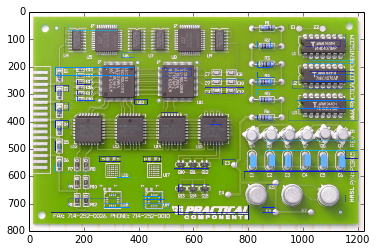

In [9]:
im = image.copy()

im, f = resize_im(im, cfg.SCALE, cfg.MAX_SCALE)

for box in texts:
    c=tuple(cm.jet([box[-1]])[0, 2::-1]*255)
    cv2.rectangle(im, tuple(box[:2]), tuple(box[2:4]), c)

plt.imshow(im)
plt.show()